# Marcenko pasture pdf and Random matrixes

Let X be i.i.d random observations of size TxN with mean 0, and variance \sigma^2 then the correlation matrix has eigenvalues \lambda distributed according to the Marcenko-Pastur distribution

\begin{equation*}
f(\lambda) = \frac{T}{N}\frac{\sqrt{( \lambda_+-\lambda )( \lambda_--\lambda )}}{2\pi\lambda\sigma^2}\unicode{x1D7D9}_{(\lambda_-,\lambda_+)}
\end{equation*}

where 
\begin{equation*}
\lambda_+ = \sigma^2(1+\sqrt{\frac{N}{T}})^2 \\
\lambda_- = \sigma^2(1-\sqrt{\frac{N}{T}})^2
\end{equation*}

When C is a correlation matrix, \sigma^2=1


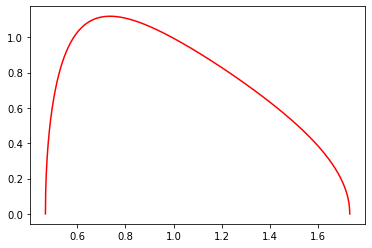

In [3]:

import pandas as pd
from sklearn.neighbors import KernelDensity
import matplotlib.pylab as plt
from scipy.optimize import minimize

#Marcenko-Pastur pdf
#q=T/N 
def mpPDF(var, q, pts):
    eMin, eMax = var*(1-(1./q)**.5)**2, var*(1+(1./q)**.5)**2 # calc lambda_minus, lambda_plus
    eVal = np.linspace(eMin, eMax, pts) #Return evenly spaced numbers over a specified interval. eVal='lambda'
    pdf = q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5 #np.allclose(np.flip((eMax-eVal)), (eVal-eMin))==True
    pdf = pd.Series(pdf, index=eVal)
    return pdf

pdf0 = mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")

In [2]:
    N = 1000
    T = 10000
    x = np.random.normal(0, 1, size = (T, N))